In [4]:
import pandas as pd
import numpy as np
import random
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    StratifiedKFold,
    KFold,
    cross_val_score
)

import sklearn
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
    matthews_corrcoef
)

from sklearn.feature_selection import RFECV

import optuna
import pickle

In [5]:
data = pd.read_csv(r'C:\Users\User\PROJECTS\chem_ai_project\data\promoter_or_non_nt_embeddings.csv')
data['label'].value_counts()

label
1    3382
0    2196
Name: count, dtype: int64

In [6]:
X = data.drop(['label', 'sequence'], axis = 1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

LGBM

In [ ]:
LGBM_model = LGBMClassifier(random_state = 42, verbose = -1)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state = 42)

rfecv = RFECV(estimator=LGBM_model, step=50, cv=cv, scoring='f1', verbose=1)
rfecv.fit(X_train, y_train)

print("Оптимальное количество признаков:", rfecv.n_features_)
print("Выбранные признаки:", X_train.columns[rfecv.support_].tolist())
LGBM_sel_features = X_train.columns[rfecv.support_].tolist()

In [ ]:
LGBM_sel_features = ['emb_1', 'emb_3', 'emb_4', 'emb_5', 'emb_6', 'emb_9', 'emb_10', 'emb_13', 'emb_14', 'emb_15', 'emb_16', 'emb_18', 'emb_19', 'emb_20', 'emb_21', 'emb_22', 'emb_23', 'emb_24', 'emb_25', 'emb_26', 'emb_27', 'emb_29', 'emb_30', 'emb_31', 'emb_32', 'emb_33', 'emb_34', 'emb_35', 'emb_36', 'emb_40', 'emb_41', 'emb_42', 'emb_43', 'emb_44', 'emb_45', 'emb_46', 'emb_47', 'emb_48', 'emb_49', 'emb_50', 'emb_51', 'emb_52', 'emb_53', 'emb_54', 'emb_55', 'emb_56', 'emb_57', 'emb_58', 'emb_60', 'emb_61', 'emb_62', 'emb_63', 'emb_64', 'emb_66', 'emb_67', 'emb_68', 'emb_70', 'emb_72', 'emb_73', 'emb_74', 'emb_75', 'emb_77', 'emb_79', 'emb_81', 'emb_82', 'emb_84', 'emb_85', 'emb_86', 'emb_88', 'emb_89', 'emb_90', 'emb_91', 'emb_92', 'emb_93', 'emb_94', 'emb_95', 'emb_96', 'emb_97', 'emb_98', 'emb_99', 'emb_101', 'emb_103', 'emb_104', 'emb_105', 'emb_106', 'emb_107', 'emb_108', 'emb_109', 'emb_110', 'emb_111', 'emb_112', 'emb_113', 'emb_114', 'emb_115', 'emb_118', 'emb_120', 'emb_121', 'emb_122', 'emb_123', 'emb_124', 'emb_125', 'emb_126', 'emb_128', 'emb_130', 'emb_131', 'emb_133', 'emb_134', 'emb_135', 'emb_136', 'emb_137', 'emb_138', 'emb_139', 'emb_140', 'emb_141', 'emb_142', 'emb_143', 'emb_144', 'emb_145', 'emb_146', 'emb_147', 'emb_148', 'emb_150', 'emb_151', 'emb_152', 'emb_153', 'emb_154', 'emb_155', 'emb_156', 'emb_157', 'emb_158', 'emb_159', 'emb_160', 'emb_161', 'emb_162', 'emb_163', 'emb_164', 'emb_165', 'emb_166', 'emb_167', 'emb_168', 'emb_169', 'emb_170', 'emb_171', 'emb_172', 'emb_173', 'emb_174', 'emb_175', 'emb_176', 'emb_177', 'emb_179', 'emb_180', 'emb_181', 'emb_184', 'emb_185', 'emb_186', 'emb_187', 'emb_189', 'emb_190', 'emb_193', 'emb_194', 'emb_195', 'emb_196', 'emb_197', 'emb_198', 'emb_199', 'emb_200', 'emb_201', 'emb_203', 'emb_204', 'emb_206', 'emb_207', 'emb_208', 'emb_209', 'emb_210', 'emb_211', 'emb_213', 'emb_214', 'emb_216', 'emb_218', 'emb_219', 'emb_220', 'emb_222', 'emb_223', 'emb_224', 'emb_225', 'emb_226', 'emb_227', 'emb_228', 'emb_229', 'emb_231', 'emb_232', 'emb_233', 'emb_235', 'emb_236', 'emb_237', 'emb_238', 'emb_239', 'emb_240', 'emb_241', 'emb_242', 'emb_243', 'emb_245', 'emb_247', 'emb_248', 'emb_249', 'emb_250', 'emb_251', 'emb_252', 'emb_253', 'emb_254', 'emb_255', 'emb_256', 'emb_257', 'emb_258', 'emb_259', 'emb_260', 'emb_261', 'emb_262', 'emb_263', 'emb_264', 'emb_265', 'emb_266', 'emb_271', 'emb_272', 'emb_274', 'emb_276', 'emb_277', 'emb_278', 'emb_279', 'emb_282', 'emb_283', 'emb_285', 'emb_287', 'emb_288', 'emb_290', 'emb_292', 'emb_293', 'emb_294', 'emb_296', 'emb_297', 'emb_298', 'emb_299', 'emb_301', 'emb_302', 'emb_304', 'emb_305', 'emb_306', 'emb_307', 'emb_308', 'emb_309', 'emb_310', 'emb_313', 'emb_314', 'emb_315', 'emb_316', 'emb_317', 'emb_319', 'emb_320', 'emb_321', 'emb_322', 'emb_324', 'emb_325', 'emb_326', 'emb_327', 'emb_328', 'emb_329', 'emb_330', 'emb_331', 'emb_333', 'emb_334', 'emb_335', 'emb_336', 'emb_337', 'emb_339', 'emb_340', 'emb_341', 'emb_342', 'emb_343', 'emb_344', 'emb_346', 'emb_348', 'emb_349', 'emb_350', 'emb_353', 'emb_354', 'emb_355', 'emb_356', 'emb_357', 'emb_358', 'emb_359', 'emb_363', 'emb_365', 'emb_366', 'emb_367', 'emb_368', 'emb_369', 'emb_370', 'emb_372', 'emb_373', 'emb_374', 'emb_376', 'emb_377', 'emb_378', 'emb_380', 'emb_382', 'emb_383', 'emb_384', 'emb_385', 'emb_386', 'emb_387', 'emb_388', 'emb_389', 'emb_390', 'emb_391', 'emb_392', 'emb_393', 'emb_394', 'emb_395', 'emb_397', 'emb_398', 'emb_399', 'emb_400', 'emb_402', 'emb_403', 'emb_404', 'emb_405', 'emb_406', 'emb_408', 'emb_410', 'emb_411', 'emb_412', 'emb_413', 'emb_414', 'emb_415', 'emb_416', 'emb_417', 'emb_418', 'emb_419', 'emb_420', 'emb_422', 'emb_425', 'emb_427', 'emb_428', 'emb_429', 'emb_430', 'emb_431', 'emb_432', 'emb_433', 'emb_434', 'emb_435', 'emb_436', 'emb_437', 'emb_440', 'emb_442', 'emb_443', 'emb_444', 'emb_445', 'emb_446', 'emb_449', 'emb_450', 'emb_452', 'emb_453', 'emb_454', 'emb_455', 'emb_456', 'emb_457', 'emb_458', 'emb_459', 'emb_460', 'emb_461', 'emb_462', 'emb_463', 'emb_464', 'emb_465', 'emb_466', 'emb_467', 'emb_468', 'emb_471', 'emb_472', 'emb_473', 'emb_474', 'emb_475', 'emb_476', 'emb_477', 'emb_478', 'emb_479', 'emb_480', 'emb_481', 'emb_482', 'emb_483', 'emb_485', 'emb_486', 'emb_487', 'emb_488', 'emb_489', 'emb_490', 'emb_491', 'emb_493', 'emb_494', 'emb_495', 'emb_496', 'emb_498', 'emb_499', 'emb_500', 'emb_501', 'emb_502', 'emb_503', 'emb_504', 'emb_505', 'emb_506', 'emb_508', 'emb_509', 'emb_510', 'emb_512', 'emb_514', 'emb_515', 'emb_516', 'emb_517', 'emb_518', 'emb_519', 'emb_521', 'emb_522', 'emb_523', 'emb_524', 'emb_525', 'emb_527', 'emb_528', 'emb_529', 'emb_531', 'emb_532', 'emb_533', 'emb_534', 'emb_535', 'emb_537', 'emb_538', 'emb_540', 'emb_541', 'emb_542', 'emb_544', 'emb_545', 'emb_547', 'emb_548', 'emb_549', 'emb_550', 'emb_551', 'emb_553', 'emb_554', 'emb_555', 'emb_557', 'emb_558', 'emb_559', 'emb_560', 'emb_561', 'emb_562', 'emb_563', 'emb_564', 'emb_565', 'emb_566', 'emb_567', 'emb_568', 'emb_570', 'emb_571', 'emb_572', 'emb_573', 'emb_575', 'emb_576', 'emb_578', 'emb_579', 'emb_580', 'emb_583', 'emb_585', 'emb_586', 'emb_588', 'emb_591', 'emb_592', 'emb_594', 'emb_595', 'emb_597', 'emb_598', 'emb_599', 'emb_600', 'emb_601', 'emb_603', 'emb_608', 'emb_609', 'emb_610', 'emb_611', 'emb_613', 'emb_615', 'emb_617', 'emb_618', 'emb_619', 'emb_620', 'emb_621', 'emb_622', 'emb_623', 'emb_624', 'emb_625', 'emb_626', 'emb_627', 'emb_628', 'emb_629', 'emb_630', 'emb_631', 'emb_632', 'emb_633', 'emb_634', 'emb_635', 'emb_636', 'emb_637', 'emb_638', 'emb_639', 'emb_640', 'emb_641', 'emb_642', 'emb_643', 'emb_644', 'emb_645', 'emb_646', 'emb_647', 'emb_648', 'emb_650', 'emb_651', 'emb_652', 'emb_653', 'emb_654', 'emb_655', 'emb_656', 'emb_657', 'emb_659', 'emb_660', 'emb_661', 'emb_663', 'emb_665', 'emb_668', 'emb_670', 'emb_671', 'emb_672', 'emb_674', 'emb_677', 'emb_678', 'emb_679', 'emb_680', 'emb_681', 'emb_685', 'emb_686', 'emb_689', 'emb_690', 'emb_691', 'emb_695', 'emb_696', 'emb_698', 'emb_699', 'emb_700', 'emb_702', 'emb_704', 'emb_705', 'emb_706', 'emb_707', 'emb_708', 'emb_709', 'emb_710', 'emb_711', 'emb_712', 'emb_714', 'emb_715', 'emb_716', 'emb_717', 'emb_718', 'emb_719', 'emb_720', 'emb_721', 'emb_722', 'emb_723', 'emb_725', 'emb_726', 'emb_727', 'emb_728', 'emb_729', 'emb_730', 'emb_731', 'emb_732', 'emb_733', 'emb_734', 'emb_735', 'emb_736', 'emb_737', 'emb_738', 'emb_739', 'emb_740', 'emb_741', 'emb_742', 'emb_743', 'emb_744', 'emb_745', 'emb_746', 'emb_747', 'emb_748', 'emb_749', 'emb_750', 'emb_751', 'emb_752', 'emb_753', 'emb_754', 'emb_755', 'emb_756', 'emb_758', 'emb_759', 'emb_760', 'emb_761', 'emb_763', 'emb_764', 'emb_766', 'emb_767', 'emb_769', 'emb_771', 'emb_773', 'emb_774', 'emb_775', 'emb_776', 'emb_777', 'emb_778', 'emb_779', 'emb_780', 'emb_781', 'emb_782', 'emb_783', 'emb_785', 'emb_786', 'emb_787', 'emb_788', 'emb_789', 'emb_790', 'emb_792', 'emb_793', 'emb_794', 'emb_796', 'emb_797', 'emb_799', 'emb_800', 'emb_802', 'emb_803', 'emb_804', 'emb_805', 'emb_807', 'emb_808', 'emb_809', 'emb_810', 'emb_811', 'emb_812', 'emb_813', 'emb_814', 'emb_815', 'emb_817', 'emb_819', 'emb_820', 'emb_822', 'emb_823', 'emb_824', 'emb_825', 'emb_826', 'emb_827', 'emb_828', 'emb_829', 'emb_831', 'emb_832', 'emb_833', 'emb_834', 'emb_835', 'emb_837', 'emb_840', 'emb_841', 'emb_842', 'emb_844', 'emb_846', 'emb_847', 'emb_848', 'emb_849', 'emb_850', 'emb_851', 'emb_852', 'emb_853', 'emb_854', 'emb_855', 'emb_856', 'emb_857', 'emb_859', 'emb_862', 'emb_863', 'emb_864', 'emb_865', 'emb_866', 'emb_867', 'emb_868', 'emb_869', 'emb_870', 'emb_872', 'emb_874', 'emb_875', 'emb_876', 'emb_877', 'emb_878', 'emb_879', 'emb_880', 'emb_881', 'emb_882', 'emb_884', 'emb_886', 'emb_887', 'emb_888', 'emb_890', 'emb_891', 'emb_892', 'emb_893', 'emb_895', 'emb_896', 'emb_897', 'emb_898', 'emb_899', 'emb_900', 'emb_901', 'emb_903', 'emb_904', 'emb_905', 'emb_906', 'emb_907', 'emb_908', 'emb_909', 'emb_910', 'emb_912', 'emb_913', 'emb_914', 'emb_915', 'emb_916', 'emb_917', 'emb_918', 'emb_919', 'emb_920', 'emb_921', 'emb_922', 'emb_923', 'emb_924', 'emb_926', 'emb_927', 'emb_928', 'emb_929', 'emb_931', 'emb_932', 'emb_933', 'emb_934', 'emb_935', 'emb_936', 'emb_937', 'emb_938', 'emb_939', 'emb_940', 'emb_942', 'emb_944', 'emb_945', 'emb_946', 'emb_948', 'emb_949', 'emb_950', 'emb_951', 'emb_952', 'emb_953', 'emb_954', 'emb_955', 'emb_956', 'emb_957', 'emb_959', 'emb_960', 'emb_962', 'emb_963', 'emb_964', 'emb_965', 'emb_966', 'emb_967', 'emb_968', 'emb_969', 'emb_971', 'emb_972', 'emb_973', 'emb_974', 'emb_975', 'emb_976', 'emb_977', 'emb_978', 'emb_979', 'emb_980', 'emb_981', 'emb_982', 'emb_984', 'emb_986', 'emb_988', 'emb_989', 'emb_990', 'emb_991', 'emb_992', 'emb_994', 'emb_995', 'emb_996', 'emb_997', 'emb_998', 'emb_999', 'emb_1000', 'emb_1001', 'emb_1004', 'emb_1005', 'emb_1006', 'emb_1007', 'emb_1008', 'emb_1010', 'emb_1011', 'emb_1012', 'emb_1015', 'emb_1016', 'emb_1017', 'emb_1018', 'emb_1019', 'emb_1020', 'emb_1021', 'emb_1022', 'emb_1023']
len(LGBM_sel_features)

824

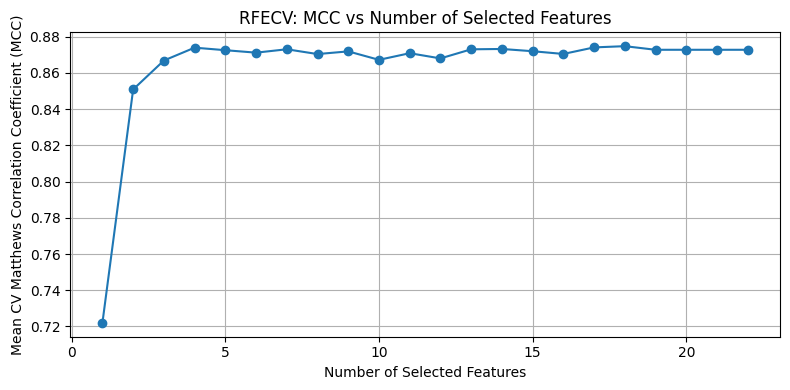

In [9]:
plt.figure(figsize=(8, 4))
plt.plot(
    range(1, len(rfecv.cv_results_["mean_test_score"]) + 1),
    rfecv.cv_results_["mean_test_score"],
    marker='o'
)
plt.title("RFECV: MCC vs Number of Selected Features")
plt.xlabel("Number of Selected Features")
plt.ylabel("Mean CV Matthews Correlation Coefficient (MCC)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
def objective(trial):
    # Подбор гиперпараметров
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 150),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.5, log=True),
        'max_depth': trial.suggest_int('max_depth', 2, 30),
        'num_leaves': trial.suggest_int('num_leaves', 5, 50),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 50),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
        'random_state': 42,
        'n_jobs': -1
    }


    model = LGBMClassifier(**param, verbose = -1, is_unbalance=True)


    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train[LGBM_sel_features], y_train, cv=cv, scoring='f1')


    return scores.mean()

In [ ]:
study_1 = optuna.create_study(direction='maximize')
study_1.optimize(objective, n_trials=100)

print("Лучшие гиперпараметры:")
print(study_1.best_params)

In [ ]:
LGBM_model = LGBMClassifier(**study_1.best_params, random_state = 42, verbose = -1)
LGBM_model.fit(X_train[LGBM_sel_features], y_train)

# Оценка на тестовой выборке
y_pred = LGBM_model.predict(X_test[LGBM_sel_features])
print("f1 на тесте:", f1_score(y_test, y_pred))

f1 на тесте: 0.8775654635527248


In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(LGBM_model, X_train[LGBM_sel_features], y_train, cv=skf, scoring='f1')
for i in range(5):
  print(f'Fold {i+1}: f1 = {scores[i]}')
print('Mean f1:', scores.mean())

Fold 1: f1 = 0.9000900090009002
Fold 2: f1 = 0.8771300448430492
Fold 3: f1 = 0.8558476881233001
Fold 4: f1 = 0.8591928251121076
Fold 5: f1 = 0.8704379562043797
Mean f1: 0.8725397046567475


Random Forest

In [ ]:
RF_model = RandomForestClassifier(random_state = 42)

cv = StratifiedKFold(n_splits=5, shuffle = True, random_state = 42)

rfecv = RFECV(estimator=RF_model, step=50, cv=cv, scoring='f1', verbose=1)
rfecv.fit(X_train, y_train)

print("Оптимальное количество признаков:", rfecv.n_features_)
print("Выбранные признаки:", X_train.columns[rfecv.support_].tolist())
RF_sel_features = X_train.columns[rfecv.support_].tolist()

In [ ]:
RF_sel_features = ['emb_15', 'emb_22', 'emb_31', 'emb_36', 'emb_40', 'emb_59', 'emb_84', 'emb_86', 'emb_97', 'emb_101', 'emb_106', 'emb_109', 'emb_110', 'emb_121', 'emb_125', 'emb_128', 'emb_133', 'emb_134', 'emb_151', 'emb_160', 'emb_165', 'emb_170', 'emb_171', 'emb_176', 'emb_186', 'emb_204', 'emb_210', 'emb_224', 'emb_226', 'emb_255', 'emb_264', 'emb_265', 'emb_276', 'emb_277', 'emb_278', 'emb_285', 'emb_292', 'emb_307', 'emb_327', 'emb_329', 'emb_339', 'emb_354', 'emb_355', 'emb_356', 'emb_363', 'emb_365', 'emb_386', 'emb_393', 'emb_398', 'emb_399', 'emb_412', 'emb_430', 'emb_431', 'emb_433', 'emb_445', 'emb_453', 'emb_454', 'emb_455', 'emb_457', 'emb_467', 'emb_471', 'emb_475', 'emb_482', 'emb_483', 'emb_487', 'emb_498', 'emb_500', 'emb_506', 'emb_518', 'emb_519', 'emb_527', 'emb_540', 'emb_553', 'emb_600', 'emb_601', 'emb_609', 'emb_610', 'emb_631', 'emb_637', 'emb_638', 'emb_648', 'emb_650', 'emb_659', 'emb_684', 'emb_696', 'emb_707', 'emb_711', 'emb_717', 'emb_726', 'emb_740', 'emb_743', 'emb_747', 'emb_756', 'emb_760', 'emb_763', 'emb_766', 'emb_781', 'emb_784', 'emb_803', 'emb_810', 'emb_822', 'emb_823', 'emb_834', 'emb_853', 'emb_857', 'emb_863', 'emb_864', 'emb_867', 'emb_876', 'emb_878', 'emb_895', 'emb_900', 'emb_921', 'emb_922', 'emb_927', 'emb_932', 'emb_948', 'emb_956', 'emb_960', 'emb_967', 'emb_972', 'emb_978', 'emb_1001', 'emb_1006']
len(RF_sel_features)

124

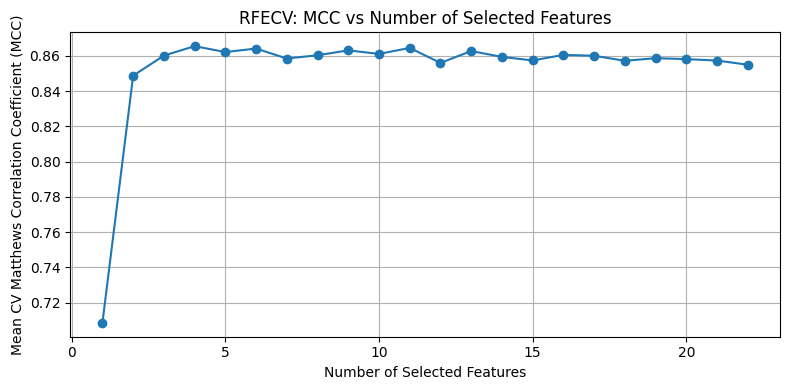

In [16]:
plt.figure(figsize=(8, 4))
plt.plot(
    range(1, len(rfecv.cv_results_["mean_test_score"]) + 1),
    rfecv.cv_results_["mean_test_score"],
    marker='o'
)
plt.title("RFECV: MCC vs Number of Selected Features")
plt.xlabel("Number of Selected Features")
plt.ylabel("Mean CV Matthews Correlation Coefficient (MCC)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 2, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced', 'balanced_subsample']),
        'random_state': 42,
        'n_jobs': -1
    }

    model = RandomForestClassifier(**param)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train[RF_sel_features], y_train, cv=cv, scoring='f1')

    return scores.mean()

In [ ]:
study_2 = optuna.create_study(direction='maximize')
study_2.optimize(objective, n_trials=100)

print("Лучшие гиперпараметры:")
print(study_2.best_params)

In [ ]:
RF_model = RandomForestClassifier(**study_2.best_params, random_state = 42)

RF_model.fit(X_train[RF_sel_features], y_train)

# Оценка на тестовой выборке
y_pred = RF_model.predict(X_test[RF_sel_features])
print("f1 на тесте:", f1_score(y_test, y_pred))

f1 на тесте: 0.8591851322373124


In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(RF_model, X_train[RF_sel_features], y_train, cv=skf, scoring='f1')
for i in range(5):
  print(f'Fold {i+1}: f1 = {scores[i]}')
print('Mean f1:', scores.mean())

Fold 1: f1 = 0.9020664869721472
Fold 2: f1 = 0.8651079136690648
Fold 3: f1 = 0.854824165915239
Fold 4: f1 = 0.8568840579710144
Fold 5: f1 = 0.8664259927797834
Mean f1: 0.8690617234614498


Final metrics comparison

In [21]:
models = [LGBM_model, RF_model]
models_names = ['LGBM', 'Random_Forest']
selected_features_list = [LGBM_sel_features, RF_sel_features]

def get_metrics(models_list, models_names, selected_features_list):
  roc_auc_metrics = []
  f1_score_metrics = []
  f1_macro_metrics = []
  f1_micro_metrics = []
  precision_metrics = []
  recall_metrics = []
  mcc_metrics = []
  FP = []
  FN = []
  TP = []
  TN = []

  for model, features in zip(models_list, selected_features_list):
    
    y_proba = model.predict_proba(X_test[features])[:, 1]
    y_pred = model.predict(X_test[features])

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    roc_auc_metrics.append(roc_auc_score(y_test, y_proba))
    f1_score_metrics.append(f1_score(y_test, y_pred))
    f1_macro_metrics.append(f1_score(y_test, y_pred, average='macro'))  
    f1_micro_metrics.append(f1_score(y_test, y_pred, average='micro'))
    precision_metrics.append(precision_score(y_test, y_pred))
    recall_metrics.append(recall_score(y_test, y_pred))
    mcc_metrics.append(matthews_corrcoef(y_test, y_pred))
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)
    TP.append(tp)

  data = pd.DataFrame({
    'model': models_names,
    'roc/auc': roc_auc_metrics,
    'f1': f1_score_metrics,
    'f1 (macro)': f1_macro_metrics,
    'f1 (micro)': f1_micro_metrics,
    'precision': precision_metrics,
    'recall': recall_metrics,
    'mcc': mcc_metrics,
    'TN': TN,
    'FP': FP,
    'FN': FN,
    'TP': TP
    })

  return data

In [22]:
results = get_metrics(models, models_names, selected_features_list)
results

,model,roc/auc,f1,f1 (macro),f1 (micro),precision,recall,mcc,TN,FP,FN,TP
0,LGBM,0.887596,0.877565,0.833166,0.844982,0.850480,0.906433,0.669432,323,109,64,620
1,Random_Forest,0.876702,0.859185,0.811345,0.823477,0.840559,0.878655,0.624101,318,114,83,601
